# Multidimensional interpolation with radial basis functions

https://en.wikipedia.org/wiki/Radial_basis_function
https://en.wikipedia.org/wiki/Radial_basis_function_kernel  
https://www.youtube.com/watch?v=_cJLVhdj0j4&t=43s  
https://www.youtube.com/watch?v=bPmj4byYbhg&t=67s  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.Rbf.html  
https://stackoverflow.com/questions/47364660/how-to-use-scipy-interpolate-rbf-in-n-dimensions  
http://scipy-cookbook.readthedocs.io/items/RadialBasisFunctions.html  
 
        
        

A radial basis function (RBF) is a real-valued function whose value depends only on the distance from the origin, so that 
$\ \phi \left(\mathbf {x} \right)=\phi \left(\left\|\mathbf {x} \right\|\right))$; 
or alternatively on the distance from some other point $\textstyle \mathbf {c}$, called a center, 
$\phi \left(\mathbf {x} ,\mathbf {c} \right)=\phi \left(\left\|\mathbf {x} -\mathbf {c} \right\|\right)$.
Any function $\phi$ that satisfies the property $\phi \left(\mathbf {x} \right)=\phi \left(\left\|\mathbf {x} \right\|\right)$ is a radial function. The norm $||$ is usually Euclidean distance, although other distance functions are also possible.

Sums of radial basis functions are typically used to approximate given functions. This approximation process can also be interpreted as a simple kind of neural network; this was the context in which they originally surfaced, in work by David Broomhead and David Lowe in 1988, which stemmed from Michael J. D. Powell's seminal research from 1977.  RBFs are also used as a kernel in support vector classification.

In broad principles, the radial basis function interpolation method works as follows:
    
1. Imagine an RBF kernel $\phi$ (e.g., a guassian) centred at each data point.
1. It would appear that all the kernels have the same mathematical 'width' or scale in all dimensions.
1. The interpolated value is given by the weighted sum of all the kernels, over all the data points. Clearly, the further the points are removed  from each other the lesser their contribution to the value at the respective points.

$$f(x) = \sum_i w_i\phi(||x-c_i||)$$
    
2. The magnitude or weights whereby each of these kernels contribute to the final signal is determined by solving a linear algebra calculation.  Solve for $w_i$ in 

$$f(c_j) = \sum_i w_i \phi(||c_j-c_i||)$$

1. As part of the solution, the user must estimate an optimal value for a parameter called epsilon. This epsilon can be considered something like a lateral width: how much should kernels affect each other, given certain distance between them.  It appears that the selection of epsilon is important and should be considered carefully.
1. With the epsilon, kernel type, width and weights known, the sum of all kernels can be used to determine the interpolated value.

The n-dimensional input values should be scaled to cover more or less the same domain scope, because these domains contribute/compete equally in the radial function distance. Suppose one dimension varies over a domain of (0,1e4) and another domain varies over a domain of (0,1) then clearly the first domain will dominate any attempt at calculating distance from a kernel centre.  Therefore normalise the input domains to cover similar scope.  
https://www.researchgate.net/post/Why_normalization_is_necessary_in_ANN  
https://visualstudiomagazine.com/articles/2014/01/01/how-to-standardize-data-for-neural-networks.aspx  
https://www.coursera.org/lecture/deep-neural-network/normalizing-inputs-lXv6U  

Considering how this radial basis function interpolation is defined, one can almost consider this a feed-forward two-layer neural net, where the first layer is a trivial input layer that must scale each dimension's input.  There is only one set of weights to be solved and these weights can be found in a single calculation.

`class scipy.interpolate.Rbf(*args)` provides a multidimensional interpolation function that uses any of the following radial base functions (`multiquadric` is default):

    `function=`
    'multiquadric': sqrt((r/self.epsilon)**2 + 1)
    'inverse': 1.0/sqrt((r/self.epsilon)**2 + 1)
    'gaussian': exp(-(r/self.epsilon)**2)
    'linear': r
    'cubic': r**3
    'quintic': r**5
    'thin_plate': r**2 * log(r)
    
You can also set the smoothness of the fit, see the documentation. See also here https://github.com/scipy/scipy/issues/4523


In [115]:
import numpy as np
import pandas as pd
from scipy.interpolate import Rbf
from scipy.interpolate import InterpolatedUnivariateSpline

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

% matplotlib inline

In [5]:
# from scipy docs
# pass node coordinates as separate values in function call
x, y, z, d = np.random.rand(4, 50)
rbfi = Rbf(x, y, z, d)  # radial basis function interpolator instance
xi = yi = zi = np.linspace(0, 1, 20)
rbfi(xi, yi, zi)   # interpolated values


array([ 0.23278761,  0.48654801,  0.76201919,  1.04843271,  1.2890371 ,
        1.36959829,  1.21004992,  0.8721696 ,  0.52896523,  0.3281435 ,
        0.31786833,  0.46831343,  0.67137754,  0.77029435,  0.67862815,
        0.45148176,  0.21607694,  0.04810765, -0.05781796, -0.12997153])

In the following example the input is five-dimensional and unpacked by the `*` in the function call.

Note that because of the unpacking the first dimension's values are `[ 0  1  2  3  4]`, the second are `[ 5  6  7  8  9]`, and the values at the nodes are `[25 26 27 28 29]`.  One would intuitively want the dimensions and values to be the columns in the input array, but it is in fact the rows, because of the unpacking.

In [35]:
# https://pythontips.com/2013/08/04/args-and-kwargs-in-python-explained/ 
def testArgs(row,*argv):
    return argv[row]

In [36]:
# from stackoverflow answer
# pass node coordinates as unpacked values in function call
a = np.arange(30)
a = a.reshape((6,5))    
print(a)
print('------------')
row = 0
print(f'{row}th dimension: {testArgs(0,*a)}')
print('------------')
f = Rbf(*a)    
o = f((2,3),(7,8),(12,13),(17,18),(22,23))
print(o)
print('------------')
x = np.array((4,9,14,19,24))
o = f(*x)
print(o)


[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]]
------------
0th dimension: [0 1 2 3 4]
------------
[ 27.  28.]
------------
29.0


## Using radial basis functions for smoothing/interpolation

http://scipy-cookbook.readthedocs.io/items/RadialBasisFunctions.html



Radial basis functions can be used for smoothing/interpolating scattered data in n-dimensions, but should be used with caution for extrapolation outside of the observed data range.

### 1-D example

This example compares the usage of the Rbf and UnivariateSpline classes from the scipy.interpolate module.


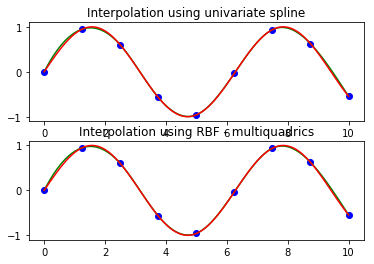

In [44]:
# setup data
x = np.linspace(0, 10, 9)
y = np.sin(x)
xi = np.linspace(0, 10, 101)

# use fitpack2 method
ius = InterpolatedUnivariateSpline(x, y)
yi = ius(xi)

plt.subplot(2, 1, 1)
plt.plot(x, y, 'bo')
plt.plot(xi, yi, 'g')
plt.plot(xi, np.sin(xi), 'r')
plt.title('Interpolation using univariate spline')

# use RBF method
rbf = Rbf(x, y)
fi = rbf(xi)

plt.subplot(2, 1, 2)
plt.plot(x, y, 'bo')
plt.plot(xi, yi, 'g')
plt.plot(xi, np.sin(xi), 'r')
plt.title('Interpolation using RBF - multiquadrics')
plt.savefig('rbf1d.png')

### 2-D example

This example shows how to interpolate scattered 2d data. The dots are the input values.

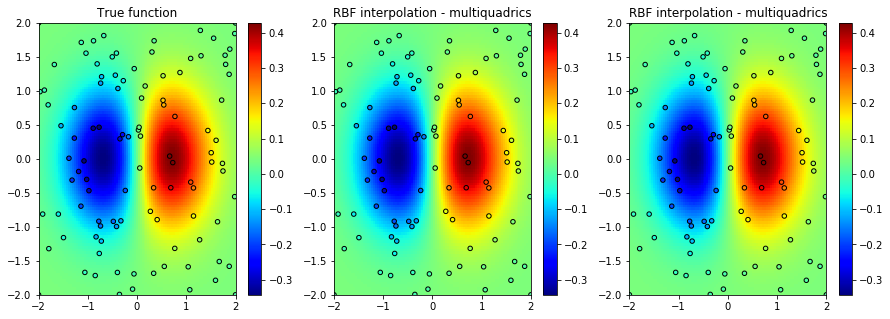

In [155]:
# 2-d tests - setup scattered data
def pfunc(x,y):
    return x*np.exp(-x**2-y**2)

numpoint = 100
x = np.random.rand(numpoint)*4.0-2.0
y = np.random.rand(numpoint)*4.0-2.0
x = np.append(x,[-2,-2,2, 2])
y = np.append(y,[-2, 2,2,-2])
z = pfunc(x,y)
ti = np.linspace(-2.0, 2.0, 100)
XI, YI = np.meshgrid(ti, ti)

# use RBF
rbf = Rbf(x, y, z, epsilon=2)
Zmq = rbf(XI, YI)
rbf = Rbf(x, y, z, function='gaussian',epsilon=1)
Zg = rbf(XI, YI)

# actual curve
Z = pfunc(XI, YI)

# plot the result
# n = plt.Normalize(-2., 2.)
plt.figure(figsize=(15,5))

for subp,zval,title in zip([1,2,3],
                           [Z,Zmq,Zg],
                           ['True function','RBF interpolation - multiquadrics','RBF interpolation - multiquadrics']):
    plt.subplot(1, 3, subp)
    plt.pcolor(XI, YI, zval, cmap=cm.jet)
    plt.scatter(x, y, 20, z, cmap=cm.jet,edgecolors='k')
    plt.title(title)
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.colorbar()

plt.savefig('rbf2d.png')

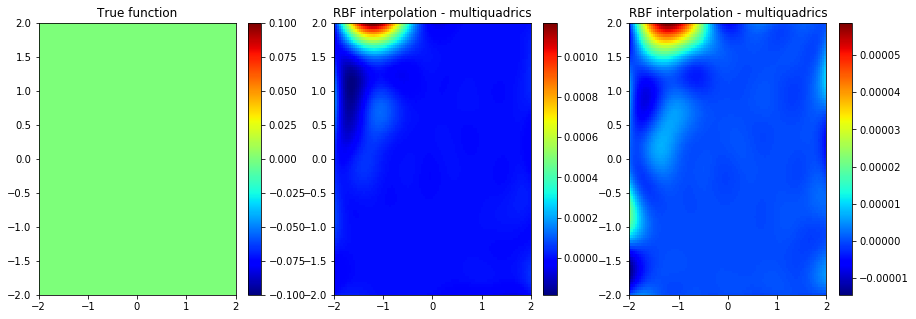

In [154]:
# n = plt.Normalize(-2., 2.)
plt.figure(figsize=(15,5))

for subp,zval,title in zip([1,2,3],
                           [Z,Zmq,Zg],
                           ['True function','RBF interpolation - multiquadrics','RBF interpolation - multiquadrics']):
    plt.subplot(1, 3, subp)
    plt.pcolor(XI, YI, Z-zval, cmap=cm.jet)
    plt.title(title)
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.colorbar()

plt.savefig('rbf2delta.png')

## Testing with real data

The following attempts to read aircraft intensity values as function altitude (pressure) and aspect angle.

The input values are normalised.

Note that the smallest angle between two points must be used, but this is not currently done. The angle distance is  calculated as the difference between two numerical values (which happens to be angles), not as the smallest angle.

whatever is wrong, it does not work. -((

          Angle    Intens  Pressure
0 -1.646821e-14   82.7874   1.00158
1  1.388889e-02   98.2384   1.00158
2  2.777778e-02  128.0670   1.00158
3  4.166667e-02  166.1440   1.00158
4  5.555556e-02  203.8180   1.00158
Angle y min=-1.646820535068888e-14 max=1.0138888888888244
Pressure min=0.265  max=1.0015800000000001
Intensity min=2.32755  max=1287.39
(3, 222)


C:\Users\NWillers\Anaconda3\lib\site-packages\scipy\interpolate\rbf.py:220: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.469041e-21
  self.nodes = linalg.solve(self.A, self.di)


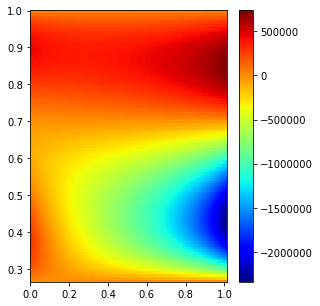

In [183]:
pressureNormalise = 1000

dfi = pd.read_csv('data/intensityvsalt.csv')
#normalise data
dfi['Angle'] /= (2*np.pi)
dfi['Pressure'] /= pressureNormalise
#remove unrequired data
dfi.drop(['Altitude'],axis=1,inplace=True)
print(dfi.head())

print(f'Angle y min={np.min(dfi["Angle"])} max={np.max(dfi["Angle"])}')
print(f'Pressure min={np.min(dfi["Pressure"])}  max={np.max(dfi["Pressure"])}')
print(f'Intensity min={np.min(dfi["Intens"])}  max={np.max(dfi["Intens"])}')
# build the table for reading into rbf 
# intensity must be the last row
data = np.vstack((dfi['Angle'].values.reshape(1,-1),
                  dfi['Pressure'].values.reshape(1,-1),
                  dfi['Intens'].values.reshape(1,-1)))
print(data.shape)

rbf = Rbf(*data, epsilon=1)

ai = np.linspace(np.min(dfi["Angle"]), np.max(dfi["Angle"]), 100)
pi = np.linspace(np.min(dfi["Pressure"]), np.max(dfi["Pressure"]) , 100)
AI,PI = np.meshgrid(ai, pi)

inty = rbf(AI, PI)

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.pcolor(AI,PI, inty, cmap=cm.jet)
plt.colorbar()



## Alternative implementation

There is an even more powerful radial base function package available here:   
https://github.com/treverhines/RBF  
https://rbf.readthedocs.io/en/latest/  
which provide additional capabilities not available in the scipy package.

Future work will investigate the package in more detail.

